<a href="https://colab.research.google.com/github/AriyaArKa/Prediction-Models/blob/main/PotholeDetect/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import os


In [15]:
import glob

In [16]:
from IPython.display import Image, display

In [17]:
from IPython import display

In [18]:
display.clear_output()

In [19]:
!nvidia-smi

Sun Aug 18 01:59:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [20]:
HOME = os.getcwd()

In [21]:
print(HOME)

/content


In [22]:
!pip install ultralytics==8.0.0

In [23]:
import ultralytics

In [24]:
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.4/78.2 GB disk)


In [25]:
!mkdir {HOME}/datasets


mkdir: cannot create directory ‘/content/datasets’: File exists


In [26]:
!pwd

/content


In [27]:
%cd {HOME}/datasets


/content/datasets


In [28]:
!pwd

/content/datasets


In [29]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="dA6s0u61fH2fVpVAWcbB")
project = rf.workspace("arka-fwppt").project("yolov8pothole")
version = project.version(1)
dataset = version.download("yolov5")


loading Roboflow workspace...
loading Roboflow project...


In [30]:
%cd {HOME}

/content


In [31]:
%cd {dataset.location}

/content/datasets/Yolov8Pothole-1


In [32]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data=/content/datasets/Yolov8Pothole-1/data.yaml epochs=70 imgsz=640

/content
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/Yolov8Pothole-1/data.yaml, epochs=70, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs

In [33]:
!ls {HOME}//runs/detect/train3

args.yaml					    R_curve.png		 train_batch1.jpg
confusion_matrix.png				    results.csv		 train_batch2.jpg
events.out.tfevents.1723944607.70fe60a8c99a.3437.0  results.png		 val_batch0_labels.jpg
F1_curve.png					    train_batch0.jpg	 val_batch0_pred.jpg
P_curve.png					    train_batch1260.jpg  val_batch1_labels.jpg
PR_curve.png					    train_batch1261.jpg  val_batch1_pred.jpg
predictions.json				    train_batch1262.jpg  weights


/content


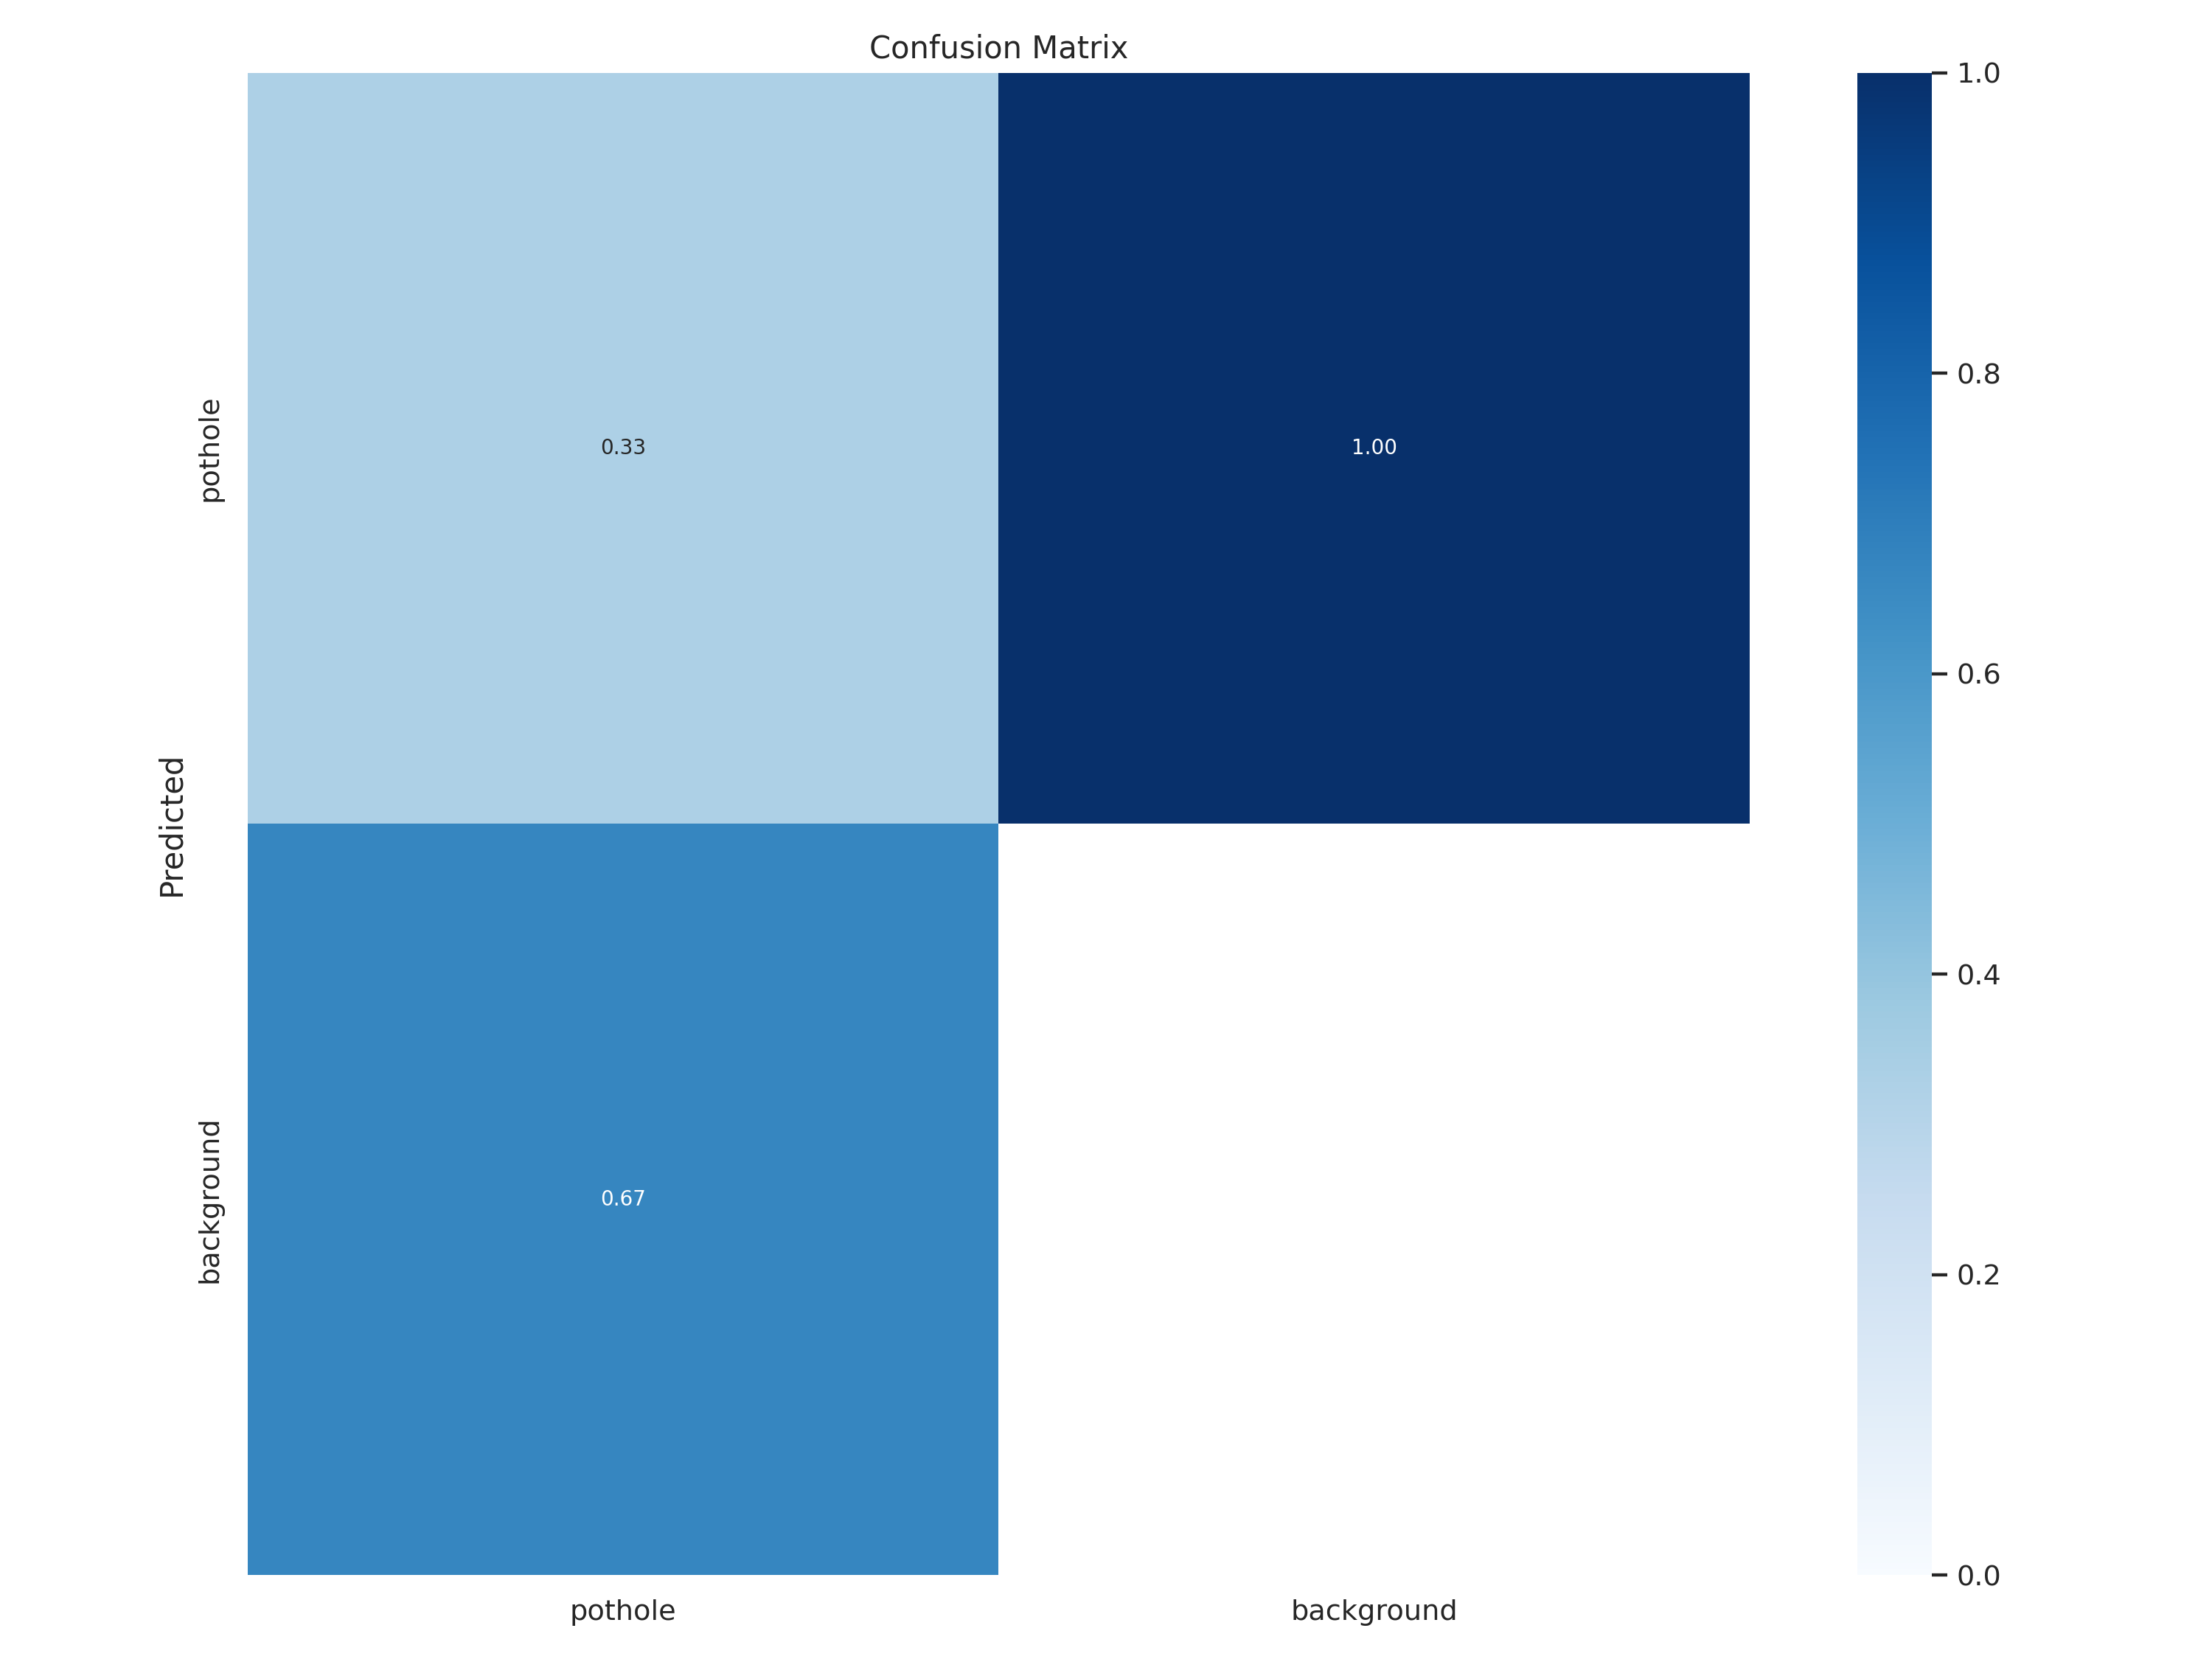

In [34]:

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=900)

/content


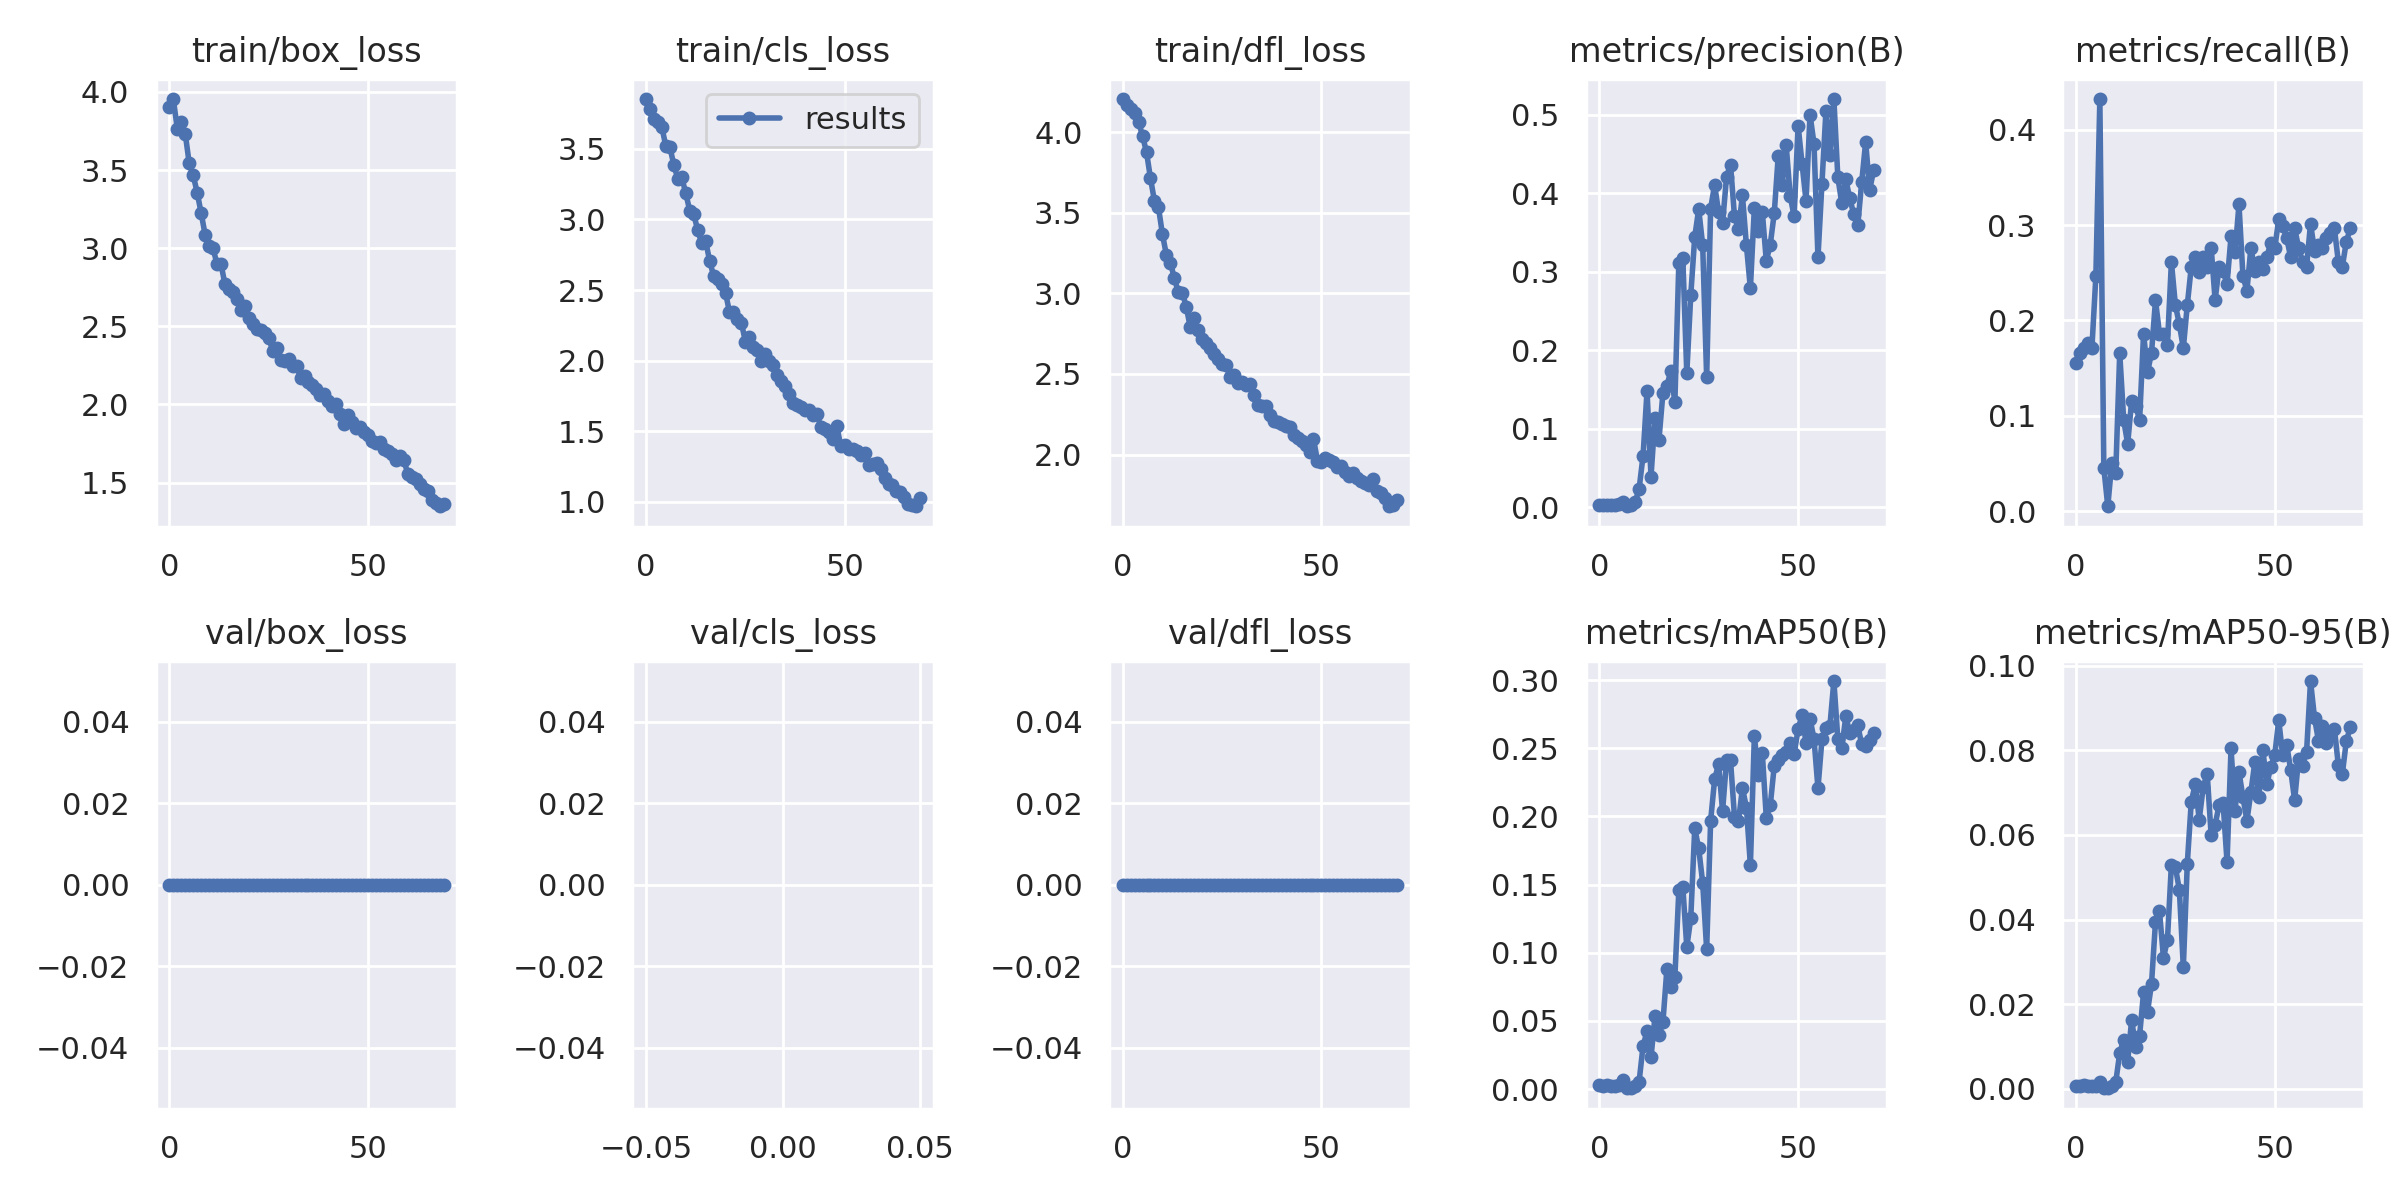

In [35]:

%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

/content


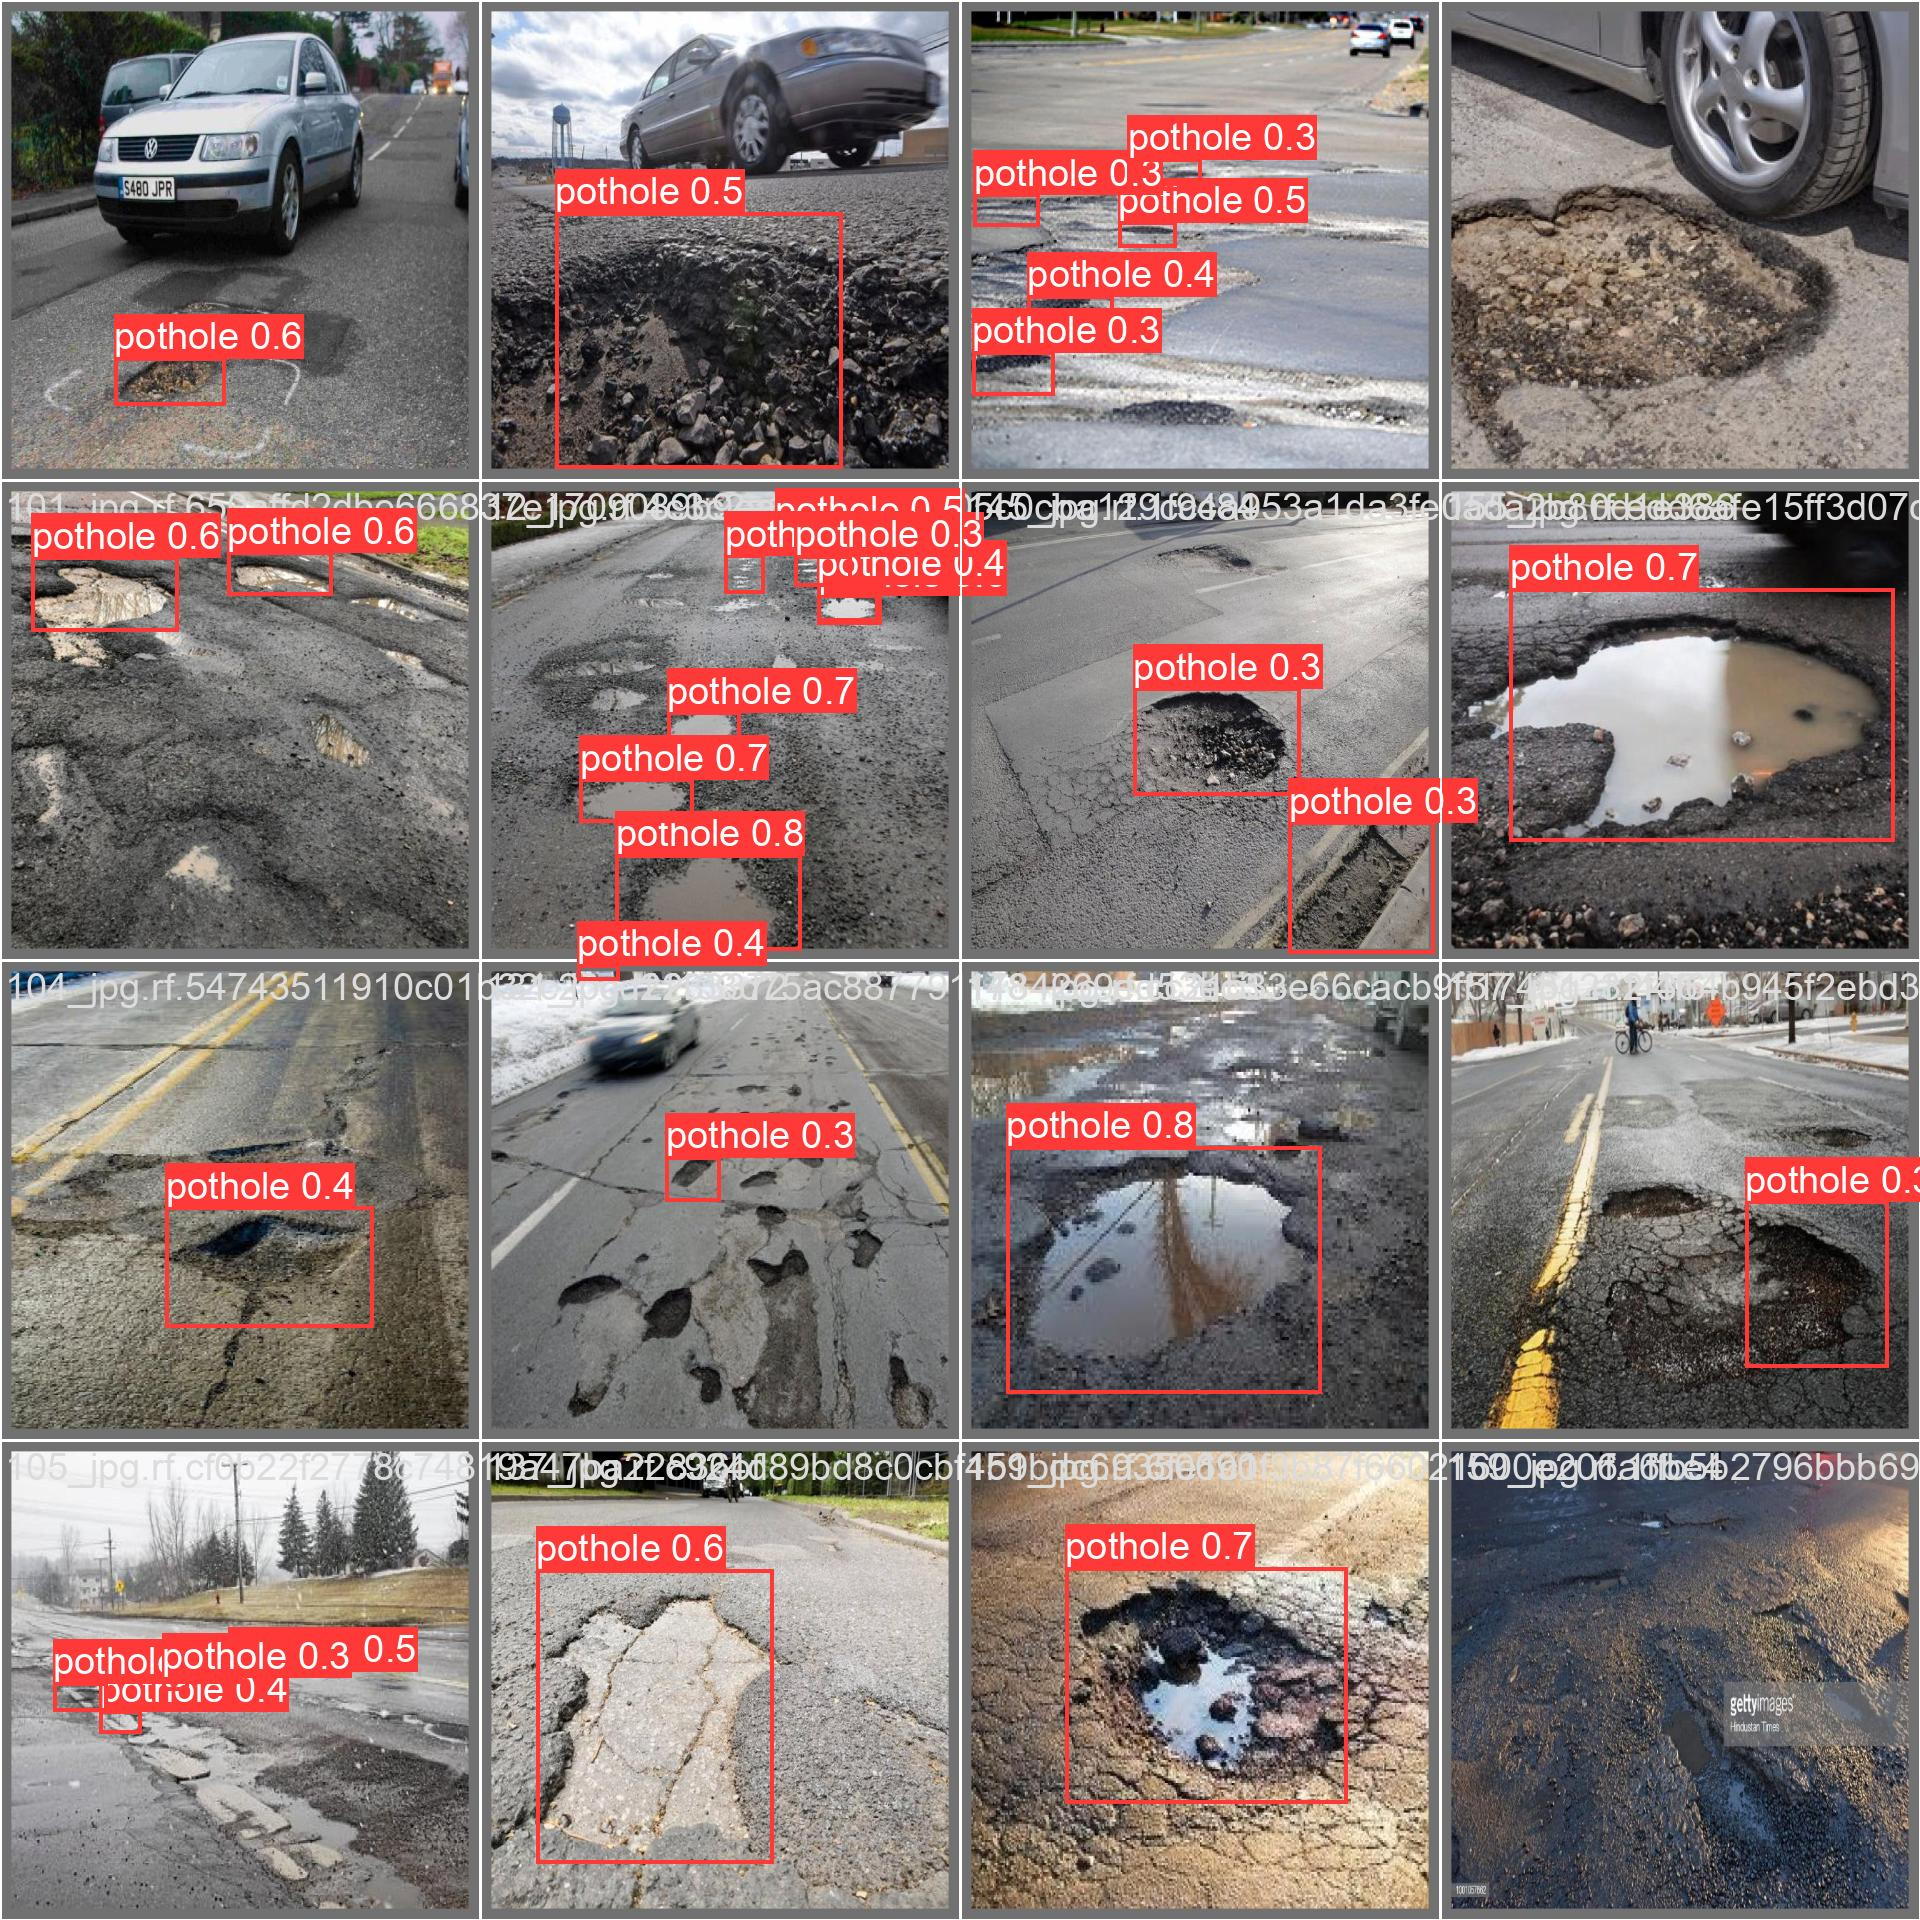

In [36]:

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=600)

In [37]:


%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data=/content/datasets/Yolov8Pothole-1/data.yaml

/content
2024-08-18 02:27:00.985539: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-18 02:27:00.985624: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-18 02:27:00.988136: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-18 02:27:00.999745: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-18 02:27:02.653523: W tensor

In [38]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source=/content/datasets/Yolov8Pothole-1/test/images

/content
2024-08-18 02:27:20.939391: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-18 02:27:20.939441: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-18 02:27:20.941204: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-18 02:27:20.951365: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-18 02:27:21.975562: W tensor

In [39]:
#Image("/content/runs/detect/predict/21.jpg")

FileNotFoundError: No such file or directory: '/content/runs/detect/predict/21.jpg'

FileNotFoundError: No such file or directory: '/content/runs/detect/predict/21.jpg'

<IPython.core.display.Image object>

In [51]:
!cp "/content/drive/MyDrive/DetectPOTHOLE/Demo2.mp4" .


In [52]:
!ls /content/


cli.log  datasets  Demo2.mp4  drive  runs  yolov8m.pt


In [41]:
#!cp "/content/drive/MyDrive/DetectPOTHOLE/Demo1.mp4" .


In [53]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source='/content/Demo2.mp4'


2024-08-18 02:31:53.264146: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-18 02:31:53.264204: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-18 02:31:53.266212: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-18 02:31:53.276999: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-18 02:31:54.470176: W tensorflow/comp

In [54]:
!rm "/content/result_compressed.mp4"

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [61]:
!ls /content/runs/detect/predict5/
save_path = '/content/runs/detect/predict/demo2.mp4'


Demo2.mp4


In [62]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path (update as needed)
save_path = '/content/runs/detect/predict/demo2.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

# Check if input video exists
if not os.path.exists(save_path):
    print(f"Error: Input video not found at {save_path}")
else:
    # Execute ffmpeg command and check for errors
    result = os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")
    if result != 0:
        print("Error: ffmpeg command failed.")
    else:
        # Check if compressed video was created successfully
        if not os.path.exists(compressed_path):
            print(f"Error: Compressed video not found at {compressed_path}")
        else:
            # Show video
            with open(compressed_path, 'rb') as f:
                mp4 = f.read()
            data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
            display(HTML(f"""
            <video width=400 controls>
                  <source src="{data_url}" type="video/mp4">
            </video>
            """))


Error: Input video not found at /content/runs/detect/predict/demo2.mp4


In [63]:
!ls /content/runs/detect/predict/


108_jpg.rf.3998108ef49660303f23644c65115ec9.jpg  169_jpg.rf.f7b6a6e4e079cc516a6fc6d3119e8aaa.jpg
111_jpg.rf.166ed9d024c8a2a14c8a7c7cc24be21e.jpg  170_jpg.rf.2bff58a32020a16bdfbcdb56819a73e9.jpg
113_jpg.rf.a3aa1cba91d111b3e936b78a16aff108.jpg  173_jpg.rf.72a08446d2eb8bebb6c7552df2f645e7.jpg
114_jpg.rf.06f208d5dc5f227a9d7edde82050b678.jpg  175_jpg.rf.66036edb6b0f34a93a1922d4d82b9993.jpg
122_jpg.rf.f0c3341bdc64d414c8bdde00b13fd087.jpg  177_jpg.rf.896867586907fd1276780e6459347ad9.jpg
136_jpg.rf.0c51bedb25492f8f36b5e32ef39e20c4.jpg  21_jpg.rf.7144951ab25303b7e5b02adcf1136487.jpg
146_jpg.rf.7b84a1719332ef410ffc64ecd97b418b.jpg  57_jpg.rf.bcb7071b2574d264bb1949d70ed91661.jpg
150_jpg.rf.b72d7b834797155020989898357b1c50.jpg  62_jpg.rf.fbea81267a35ae2624bc7a025fc59fd9.jpg
156_jpg.rf.05314c87db5f6f10a97c42c971311025.jpg  76_jpg.rf.6965e00a2979512ced7d8b210f8a997b.jpg
158_jpg.rf.e9d5089e925b1db3081eafdbb4235fa0.jpg  92_jpg.rf.8e867d0ac2cfb6e60a6fdeb14d591294.jpg


In [64]:
save_path = '/content/runs/detect/predict5/demo2.mp4'


In [65]:
from google.colab import files
uploaded = files.upload()


Saving mixkit-potholes-in-a-rural-road-25208-hd-ready.mp4 to mixkit-potholes-in-a-rural-road-25208-hd-ready.mp4


In [66]:
!mv /content/demo2.mp4 /content/runs/detect/predict/


mv: cannot stat '/content/demo2.mp4': No such file or directory


In [67]:
!ls /content/runs/detect/predict/


108_jpg.rf.3998108ef49660303f23644c65115ec9.jpg  169_jpg.rf.f7b6a6e4e079cc516a6fc6d3119e8aaa.jpg
111_jpg.rf.166ed9d024c8a2a14c8a7c7cc24be21e.jpg  170_jpg.rf.2bff58a32020a16bdfbcdb56819a73e9.jpg
113_jpg.rf.a3aa1cba91d111b3e936b78a16aff108.jpg  173_jpg.rf.72a08446d2eb8bebb6c7552df2f645e7.jpg
114_jpg.rf.06f208d5dc5f227a9d7edde82050b678.jpg  175_jpg.rf.66036edb6b0f34a93a1922d4d82b9993.jpg
122_jpg.rf.f0c3341bdc64d414c8bdde00b13fd087.jpg  177_jpg.rf.896867586907fd1276780e6459347ad9.jpg
136_jpg.rf.0c51bedb25492f8f36b5e32ef39e20c4.jpg  21_jpg.rf.7144951ab25303b7e5b02adcf1136487.jpg
146_jpg.rf.7b84a1719332ef410ffc64ecd97b418b.jpg  57_jpg.rf.bcb7071b2574d264bb1949d70ed91661.jpg
150_jpg.rf.b72d7b834797155020989898357b1c50.jpg  62_jpg.rf.fbea81267a35ae2624bc7a025fc59fd9.jpg
156_jpg.rf.05314c87db5f6f10a97c42c971311025.jpg  76_jpg.rf.6965e00a2979512ced7d8b210f8a997b.jpg
158_jpg.rf.e9d5089e925b1db3081eafdbb4235fa0.jpg  92_jpg.rf.8e867d0ac2cfb6e60a6fdeb14d591294.jpg


In [68]:
from IPython.display import HTML, display
from base64 import b64encode
import os

# Correct file path
save_path = '/content/runs/detect/predict/demo2.mp4'
compressed_path = "/content/result_compressed.mp4"

# Check if input video exists
if not os.path.exists(save_path):
    print(f"Error: Input video not found at {save_path}")
else:
    # Execute ffmpeg command
    result = os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")
    if result != 0:
        print("Error: ffmpeg command failed.")
    else:
        # Check if compressed video was created
        if not os.path.exists(compressed_path):
            print(f"Error: Compressed video not found at {compressed_path}")
        else:
            # Show video
            with open(compressed_path, 'rb') as f:
                mp4 = f.read()
            data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
            display(HTML(f"""
            <video width=400 controls>
                  <source src="{data_url}" type="video/mp4">
            </video>
            """))


Error: Input video not found at /content/runs/detect/predict/demo2.mp4


In [69]:
# Rename the uploaded file to the expected name
!mv /content/mixkit-potholes-in-a-rural-road-25208-hd-ready.mp4 /content/runs/detect/predict/demo2.mp4


In [70]:
!ls /content/runs/detect/predict/


108_jpg.rf.3998108ef49660303f23644c65115ec9.jpg  170_jpg.rf.2bff58a32020a16bdfbcdb56819a73e9.jpg
111_jpg.rf.166ed9d024c8a2a14c8a7c7cc24be21e.jpg  173_jpg.rf.72a08446d2eb8bebb6c7552df2f645e7.jpg
113_jpg.rf.a3aa1cba91d111b3e936b78a16aff108.jpg  175_jpg.rf.66036edb6b0f34a93a1922d4d82b9993.jpg
114_jpg.rf.06f208d5dc5f227a9d7edde82050b678.jpg  177_jpg.rf.896867586907fd1276780e6459347ad9.jpg
122_jpg.rf.f0c3341bdc64d414c8bdde00b13fd087.jpg  21_jpg.rf.7144951ab25303b7e5b02adcf1136487.jpg
136_jpg.rf.0c51bedb25492f8f36b5e32ef39e20c4.jpg  57_jpg.rf.bcb7071b2574d264bb1949d70ed91661.jpg
146_jpg.rf.7b84a1719332ef410ffc64ecd97b418b.jpg  62_jpg.rf.fbea81267a35ae2624bc7a025fc59fd9.jpg
150_jpg.rf.b72d7b834797155020989898357b1c50.jpg  76_jpg.rf.6965e00a2979512ced7d8b210f8a997b.jpg
156_jpg.rf.05314c87db5f6f10a97c42c971311025.jpg  92_jpg.rf.8e867d0ac2cfb6e60a6fdeb14d591294.jpg
158_jpg.rf.e9d5089e925b1db3081eafdbb4235fa0.jpg  demo2.mp4
169_jpg.rf.f7b6a6e4e079cc516a6fc6d3119e8aaa.jpg


In [ ]:
from IPython.display import HTML, display
from base64 import b64encode
import os

# Correct file path
save_path = '/content/runs/detect/predict/demo2.mp4'
compressed_path = "/content/result_compressed.mp4"

# Check if input video exists
if not os.path.exists(save_path):
    print(f"Error: Input video not found at {save_path}")
else:
    # Execute ffmpeg command
    result = os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")
    if result != 0:
        print("Error: ffmpeg command failed.")
    else:
        # Check if compressed video was created
        if not os.path.exists(compressed_path):
            print(f"Error: Compressed video not found at {compressed_path}")
        else:
            # Show video
            with open(compressed_path, 'rb') as f:
                mp4 = f.read()
            data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
            display(HTML(f"""
            <video width=400 controls>
                  <source src="{data_url}" type="video/mp4">
            </video>
            """))


In [75]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!mkdir demo


In [74]:
echo "# Prediction-Models" >> README.md
git init
git add README.md
git add .
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/AriyaArKa/Prediction-Models.git
git push -u origin main

SyntaxError: invalid syntax (<ipython-input-74-b8f13303b555>, line 1)

In [79]:
!git config --global user.email "natharka55@gmail.com"
!git config --global user.name "ariyaArKa"

In [ ]:
# Create 'demo' folder and add a test file
!mkdir demo
!echo "This is a test file" > demo/example.txt

# Initialize Git repository
%cd /content
!git init

# Create a README.md file
!echo "# Prediction-Models" > README.md

# Add and commit files
!git add README.md
!git add demo/
!git add .
!git commit -m "first commit"

# Set up remote repository and push
!git branch -M main
!git remote add origin https://github.com/AriyaArKa/Prediction-Models.git
!git push -u origin main


mkdir: cannot create directory ‘demo’: File exists
/content
Reinitialized existing Git repository in /content/.git/
